In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
import seaborn as sns
iris = sns.load_dataset('iris')

data = torch.tensor( iris[iris.columns[0:4]].values ).float()

labels = torch.zeros(len(data), dtype=torch.long)

labels[iris.species == 'setosa'] = 0
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

## create our fake dataset

In [5]:
fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata), print(' ')
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [11]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = \
                        train_test_split(
                            fakedata, 
                            fakelabels, 
                            test_size=.2, # train_size = .8 
                            shuffle=True)

# NOTE the third input parameter above.
# This can be specified as test size or training size.
# Be mindful of which parameter is written!

# print out the sizes
print('Training data size: ' + str(train_data.shape))
print('Test data size: ' + str(test_data.shape))
print(' ')

# print out the train/test data
print('Training data: ')
print(train_data)
print(' ')

print('Test data: ')
print(test_data)

Training data size: (8, 4)
Test data size: (2, 4)
 
Training data: 
[[ 51  52  53  54]
 [101 102 103 104]
 [ 31  32  33  34]
 [ 71  72  73  74]
 [ 41  42  43  44]
 [ 91  92  93  94]
 [ 81  82  83  84]
 [ 21  22  23  24]]
 
Test data: 
[[11 12 13 14]
 [61 62 63 64]]


In [12]:
def createANewModel():

  # model architecture
  ANNiris = nn.Sequential(
      nn.Linear(4,64),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,64),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,3),   # output units
        )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

  return ANNiris,lossfun,optimizer

In [15]:
# train the model

# global parameter
numepochs = 200

def trainTheModel(trainProp, ANNiris, lossfun, optimizer):

  # initialize losses
  trainAcc = []
  testAcc  = []

  # separate train from test data
  X_train,X_test, y_train,y_test = train_test_split(data,labels, train_size=trainProp)
  
  # loop over epochs
  for _ in range(numepochs):

    # forward pass and loss
    yHat = ANNiris(X_train)
    loss = lossfun(yHat,y_train)
    
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute training accuracy
    trainAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y_train).float()).item() )
    
    # test accuracy
    predlabels = torch.argmax( ANNiris(X_test),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y_test).float()).item() )
  
  # function output
  return trainAcc,testAcc


In [16]:
# create a model
ANNiris,lossfun,optimizer = createANewModel()

# train the model
# NOTE: the input is the training proportion, not the test proportion!
trainAcc,testAcc = trainTheModel(.8,ANNiris,lossfun,optimizer)

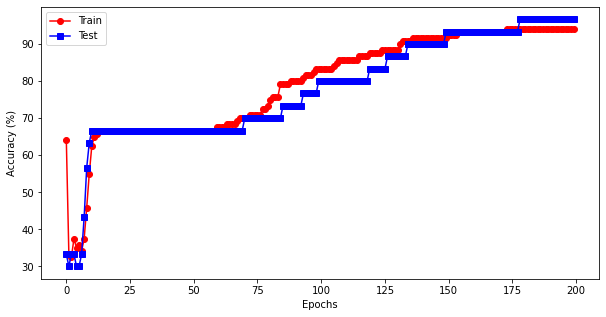

In [17]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])
plt.show()

In [18]:
trainSetSizes = np.linspace(.2,.95,10)

allTrainAcc = np.zeros((len(trainSetSizes),numepochs))
allTestAcc = np.zeros((len(trainSetSizes),numepochs))

for i in range(len(trainSetSizes)):
  
  # create a model
  ANNiris,lossfun,optimizer = createANewModel()
  
  # train the model
  trainAcc,testAcc = trainTheModel(trainSetSizes[i], ANNiris, lossfun, optimizer)
  
  # store the results
  allTrainAcc[i,:] = trainAcc
  allTestAcc[i,:] = testAcc
  print(i)

0
1
2
3
4
5
6
7
8
9


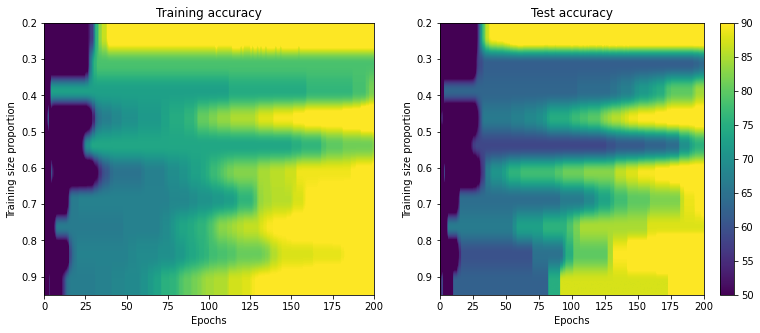

In [19]:
fig,ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(allTrainAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(allTestAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()